# Identifying Car Brand with Deep Transfer Learning (ResNet50)

In [1]:
# we will need these as we are using transfer learning and we will have to train our own last layer(s)
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential, Model, load_model

# importing pre-trained modeland a fuction to pre-process our image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# for image data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
# usual imports
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Datasets
Car Brand Images dataset:

https://github.com/krishnaik06/Deep-Learning-Car-Brand/blob/master/Datasets.zip

In [3]:
train_path = "Dataset/Train"
valid_path = "Dataset/Valid"

In [4]:
#useful for getting number of classes
folders = glob("Dataset/Train/*")
folders

['Dataset/Train\\audi',
 'Dataset/Train\\lamborghini',
 'Dataset/Train\\mercedes']

### Downloading the pretrained ResNet50 model with weights trained for ImageNet:

More Info.: https://keras.io/api/applications/

In [5]:
#resize all the images to this
image_size = [224, 224]

In [6]:
# we will not include last layer include_top=False
resnet = ResNet50(input_shape=image_size+[3], weights="imagenet", include_top=False)

In [7]:
#don't train existing weights
for layer in resnet.layers:
    layer.trainable=False

### Model Construction

In [8]:
#our layers
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation="softmax")(x)

In [10]:
#create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
#view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
#image_data_augmentation
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255)

training_set = train_datagen.flow_from_directory(train_path, batch_size=16,
                                                 target_size=(224, 224), class_mode="categorical")

validation_set = val_datagen.flow_from_directory(valid_path, batch_size=16,
                                                 target_size=(224, 224), class_mode="categorical")

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [15]:
# fit the model
r = model.fit(training_set, validation_data=validation_set, epochs=50,
                        steps_per_epoch=len(training_set), validation_steps=len(validation_set))

Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 4.8505 - accuracy: 0.4375 - val_loss: 3.0801 - val_accuracy: 0.1552
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 2.6455 - accuracy: 0.4844 - val_loss: 2.5884 - val_accuracy: 0.3276
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 2.2268 - accuracy: 0.5156 - val_loss: 3.6950 - val_accuracy: 0.3103
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 2.2040 - accuracy: 0.5781 - val_loss: 1.2517 - val_accuracy: 0.5345
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 1.4491 - accuracy: 0.4844 - val_loss: 1.3807 - val_accuracy: 0.4483
Epoch 6/50
4/4 [==============================] - 9s 2s/step - loss: 1.6165 - accuracy: 0.6562 - val_loss: 1.6069 - val_accuracy: 0.6207
Epoch 7/50
4/4 [==============================] - 9s 2s/step - loss: 1.1509 - accuracy: 0.5938 - val_loss: 2.6069 - val_accuracy: 0.3966
Epoch 8/50
4/4 [=========================

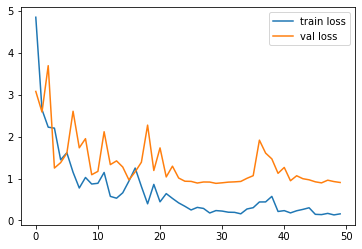

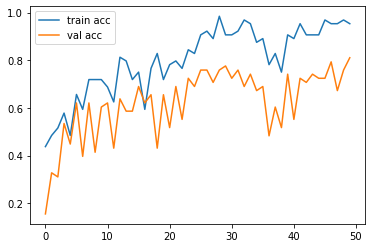

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
y_pred = model.predict(validation_set)
y_pred[0:50]

array([[4.69193786e-01, 1.06272720e-01, 4.24533427e-01],
       [2.25600461e-03, 9.97677267e-01, 6.67387649e-05],
       [7.91901425e-02, 8.69741499e-01, 5.10684289e-02],
       [3.24241631e-02, 1.71481376e-03, 9.65860963e-01],
       [3.20031168e-03, 9.72270966e-01, 2.45287623e-02],
       [1.65522490e-02, 3.49340558e-01, 6.34107232e-01],
       [7.23598361e-01, 7.60766678e-03, 2.68793911e-01],
       [4.96657230e-02, 1.19639441e-01, 8.30694795e-01],
       [9.15168881e-01, 7.21743256e-02, 1.26568926e-02],
       [9.90071177e-01, 7.51137594e-03, 2.41741491e-03],
       [6.80923695e-04, 9.92996156e-01, 6.32295292e-03],
       [1.63415056e-02, 4.39588994e-01, 5.44069469e-01],
       [6.02009118e-01, 2.77041197e-01, 1.20949686e-01],
       [8.71297717e-02, 8.31476629e-01, 8.13936070e-02],
       [1.10101014e-01, 3.49068254e-01, 5.40830791e-01],
       [1.07085973e-03, 9.79995906e-01, 1.89333353e-02],
       [5.55006564e-02, 1.07729174e-02, 9.33726490e-01],
       [4.73699620e-04, 9.98545

In [19]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[0:50]

array([0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1], dtype=int64)

In [20]:
#save the model as a h5 file
model.save("car_brand_classification_resnet50.h5")

In [21]:
model=load_model("car_brand_classification_resnet50.h5")

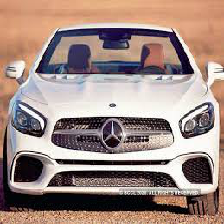

In [29]:
img=load_img('trial.jpg',target_size=(224,224))
img

In [30]:
x=img_to_array(img)
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [33]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
pred = model.predict(img_data)
pred

array([[3.948177e-04, 6.107917e-05, 9.995441e-01]], dtype=float32)

In [35]:
pred_binary=np.argmax(pred, axis=1)
print(int(pred_binary))

2


In [37]:
def predict_covid(filepath):
    img=load_img(filepath, target_size=(224,224))
    x=img_to_array(img)
    x=x/255
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    pred=model.predict(img_data)
    pred_binary=int(np.argmax(pred, axis=1))
    if pred_binary == 0:
        result = "audi"
    if pred_binary == 1:
        result = "lamborghini"
    if pred_binary == 2:
        result = "mercedes"
    return result

In [39]:
filepath = "trial.jpg"
prediction = predict_covid(filepath)
prediction

'mercedes'